# ASSIGNMENT #6 - MODEL DATA #
Due: 21 April 2024 @ 11:59p

Purpose:\
The purpose of this assignment is to examine the netCDF data format using model data and plotting the output.  

Overview:\
In this assignment you will read in ECMWF ERA-40 Reanalysis netCDF4 and plot the data on a map.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 21 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [1]:
#information allowing anyone with the code to print the author and contact information
__author__="Nadya E. Freund"
__contact__="nadya.freund@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [2]:
from netCDF4 import Dataset

from datetime import datetime, timedelta

import numpy as np

from metpy.units import units

import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### OPEN NETCDF FILE ###

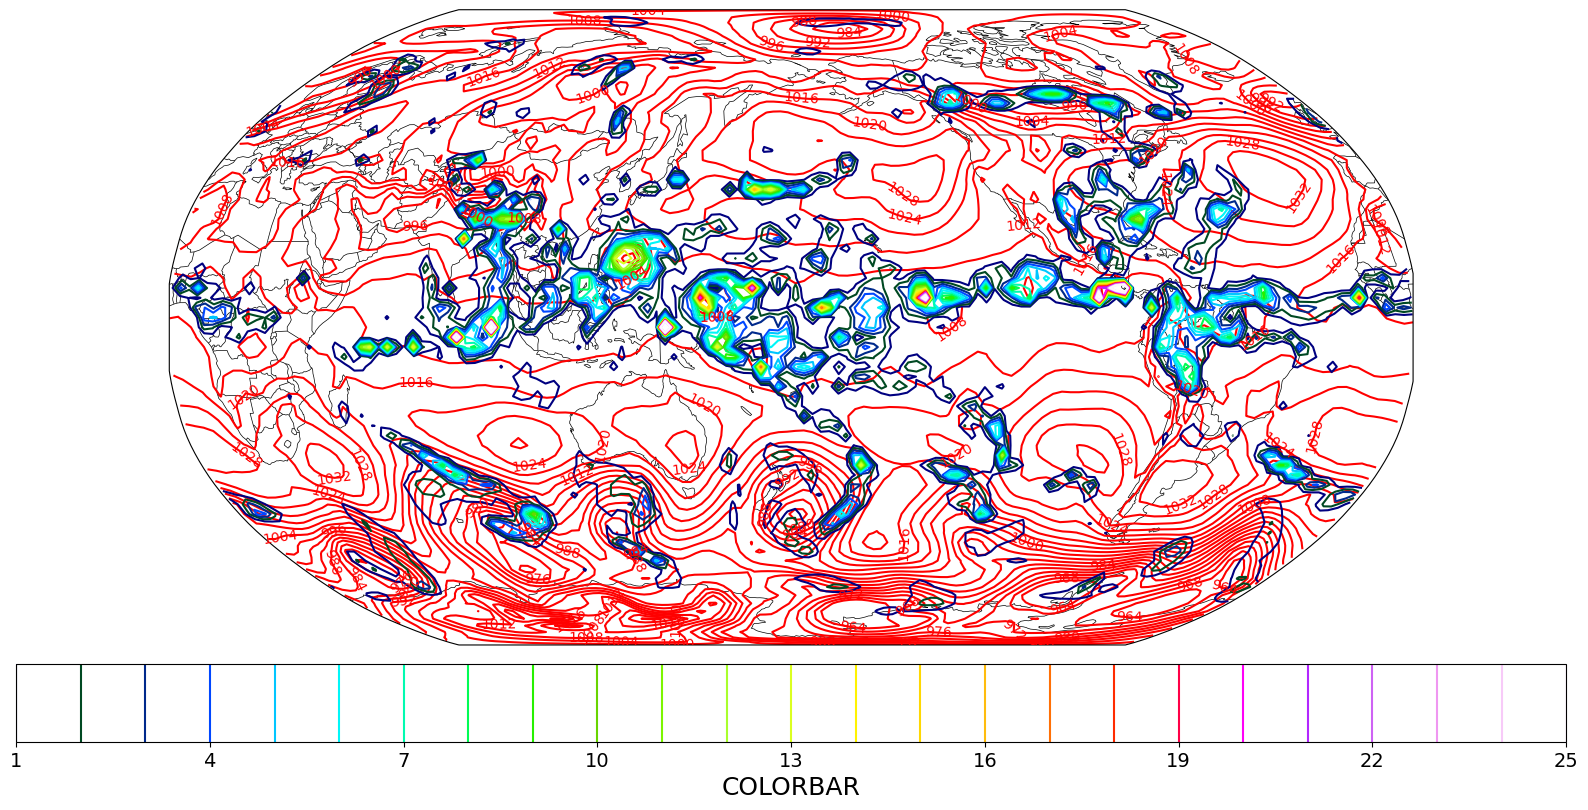

In [53]:
data=Dataset('ECMWF_ERA-40_subset.nc','r')
    
#analyze the variables and plot (on a map) SLP (contour labels start at 964mb), 10-m winds, and total precipitation
lat=data.variables['latitude'][:]
lon=data.variables['longitude'][:]

#hours since 1900-01-01 @ 00:00:00
time=data.variables['time'][:]
start_time=datetime(1900,1,1,0,0)
dts=np.empty(len(time),dtype=datetime)
#"yes, enumerate, they are implicitly matched together"
for index,t in enumerate(time):
    dts[index]=start_time+timedelta(hours=int(t))
    
tp=data.variables['tp'][:]*1000
p10u=data.variables['p10u'][:]
p10v=data.variables['p10v'][:]
msl=data.variables['msl'][:]/100

#map projection using Robinson Cartopy Projection
#center the map at 181W
#cartopy.crs.Robinson(central_longitude=0,globe=None)
proj=ccrs.Robinson(central_longitude=-181,globe=None)

#create ___" x ___" figure with a dpi=___
fig=plt.figure(figsize=(20,10),dpi=100)
ax=plt.axes(projection=proj)

#add elements to make map more useable
ax.add_feature(cfeature.COASTLINE,linewidth=0.5)
ax.add_feature(cfeature.BORDERS,linewidth=0.5)

#msl contours
clevs=np.arange(964,1100,4)
cmsl=plt.contour(lon,lat,msl[0],clevs,transform=ccrs.PlateCarree(),colors='red')
ax.clabel(cmsl,inline=True)

#tp contours
ctp=plt.contour(lon,lat,tp[1],cmap='gist_ncar',transform=ccrs.PlateCarree(),levels=np.arange(1,26,1))

#colorbar
colorbar=plt.colorbar(orientation='horizontal',pad=0.025)
colorbar.set_label('COLORBAR',fontsize=18)
colorbar.ax.tick_params(labelsize=14)

##this plot is super cool
##"January... April... July...!"
#plt.imshow(msl[0])
#plt.colorbar()